<a href="https://colab.research.google.com/github/BobChrismansyah/Data-Mining/blob/main/TugasCitra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Nama : Bob Chrismansyah Pata'dungan Kabanga
### NIM : H071021087
#### Tugas : Pemrosesan Citra Digital ~ 10/04/22

In [251]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as sublots
import cv2
import skimage.io
from PIL import Image, ImageEnhance, ImageDraw, ImageChops
from skimage.io import imread
from google.colab.patches import cv2_imshow
from math import sin, cos, pi
import matplotlib.image as mping
import imageio

# Nomor 1 *



###Transformasi menjadi citra biner Menggunakan thresholding dengan nilai T = 100

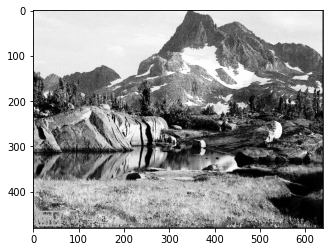

In [252]:
img_raw = cv2.imread('mountain.bmp',1)
plt.imshow(img_raw)
plt.show()

In [253]:
ret,thresh1 = cv2.threshold(img_raw,100,255,cv2.THRESH_BINARY)

In [254]:
titles = ['BINARY']
images = [img_raw, thresh1]

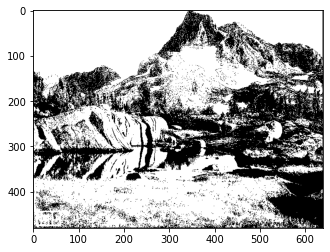

In [255]:
plt.imshow(images[1],'gray')
plt.show()

###Transformasi menjadi citra negatif

####cara 1

In [256]:
CITRA = Image.open('mountain.bmp')

ukuran_horizontal = CITRA.size[0]
ukuran_vertikal = CITRA.size[1]

PIXEL = CITRA.load()

for x in range(ukuran_horizontal):
    for y in range(ukuran_vertikal):
        R = 255 - PIXEL[x, y][0]
        G = 255 - PIXEL[x, y][1]
        B = 255 - PIXEL[x, y][2]
        PIXEL[x, y] = (R, G, B)

CITRA.save('gambar_negatif.jpg')

####cara 2

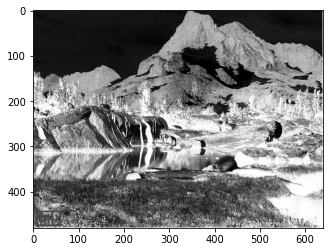

In [257]:
L = img_raw.max()
negative = L - img_raw
plt.imshow(negative)
plt.show()


###Tingkatkan kecerahan citra

b = 100 (beta)

####Cara 1

In [258]:
def clipping(intensitas):
    if intensitas < 0:
        return 0
    if intensitas > 255:
        return 255
    return intensitas

def atur_pencerahan(nilai_pencerahan, nama_setelah_disave):
    CITRA = Image.open('mountain.bmp')
    PIXEL = CITRA.load()

    ukuran_horizontal = CITRA.size[0]
    ukuran_vertikal = CITRA.size[1]

    for x in range(ukuran_horizontal):
        for y in range(ukuran_vertikal):
            R = clipping(PIXEL[x, y][0] + nilai_pencerahan)
            G = clipping(PIXEL[x, y][1] + nilai_pencerahan)
            B = clipping(PIXEL[x, y][2] + nilai_pencerahan)
            PIXEL[x, y] = (R, G, B)

    CITRA.save(nama_setelah_disave)
atur_pencerahan(100, 'gambar_dicerahkan.jpg')

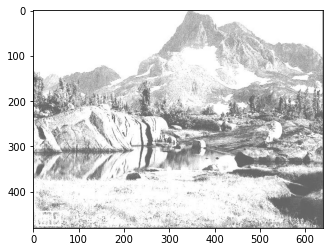

In [259]:
im = mpimg.imread('gambar_dicerahkan.jpg')
plt.imshow(im) 
plt.show()

####Cara 2

In [260]:
img = img_raw
a =2.2
b = 100
result = cv2.addWeighted(img, a, np.zeros(img.shape,img.dtype),0,b);

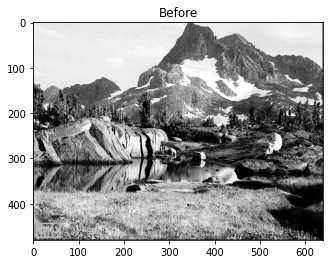

In [261]:
plt.title("Before")
plt.imshow(img_raw)

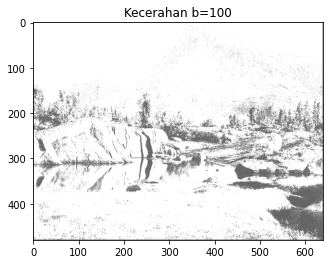

In [262]:
plt.title("Kecerahan b=100")
plt.imshow(result)

#Nomor 2 *
####konversi citra menggunakan nilai rata-rata RGB

(256, 256, 3)


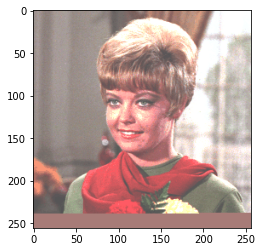

In [263]:
img_girl = 'girl-warna.bmp'

img = cv2.imread(img_girl)
print(img.shape)

fix_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(fix_img)

R, G, B = fix_img[:,:,0], fix_img[:,:,1],fix_img[:,:,2]

[[148.         143.         144.66666667 ... 255.         255.
  255.        ]
 [152.         144.66666667 145.66666667 ... 255.         255.
  255.        ]
 [143.         145.         155.33333333 ... 255.         254.
  254.        ]
 ...
 [136.33333333 136.33333333 136.33333333 ... 136.33333333 136.33333333
  136.33333333]
 [136.33333333 136.33333333 136.33333333 ... 136.33333333 136.33333333
  136.33333333]
 [136.33333333 136.33333333 136.33333333 ... 136.33333333 136.33333333
  136.33333333]]


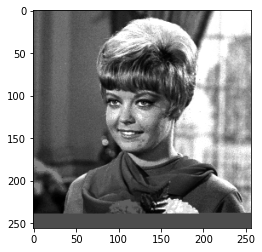

In [264]:
grayscale_average_img = np.mean(fix_img, axis=2)
print(grayscale_average_img)
plt.imshow(grayscale_average_img, cmap='gray')

# Nomor 3 *

###soal nomor 2 dengan menggunakan rumus *Y=0.299R+0.587G+0.144B*

[[148.349 142.876 146.736 ... 255.    255.    255.   ]
 [152.431 146.736 145.083 ... 255.    255.    255.   ]
 [142.876 144.218 152.81  ... 255.    254.103 254.103]
 ...
 [135.7   135.7   135.7   ... 135.7   135.7   135.7  ]
 [135.7   135.7   135.7   ... 135.7   135.7   135.7  ]
 [135.7   135.7   135.7   ... 135.7   135.7   135.7  ]]


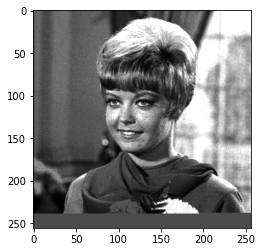

In [265]:
Y = 0.299 * R + 0.587 * G + 0.114 * B
print(Y)
plt.imshow(Y, cmap='gray')

#Soal Nomor 4 *
####Gabungkan citra bird.bmp(citra A) dan san.bmp (citra B) menggunakan rumus C = αA + (1-α)B dimana nilai α=0.8

In [266]:
src1 = cv2.imread('bird.bmp')
src2 = cv2.imread('san.bmp')

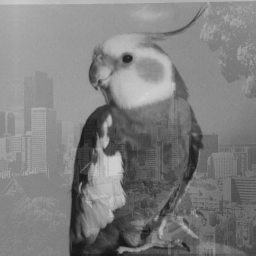

In [267]:
from google.colab.patches import cv2_imshow
α = 0.8
dst = cv2.addWeighted(src1, α, src2, (1.0 - α), 0.0)

cv2_imshow(dst)

#Soal Nomor 5
###perbedaan antara citra lena_gray.bmp dan lena_gray2.bmp.

#Soal Nomor 6 *
####Tingkatkan kecerahan citra zelda.bmp dengan menggunakan perkalian dengan konstanta k = 2

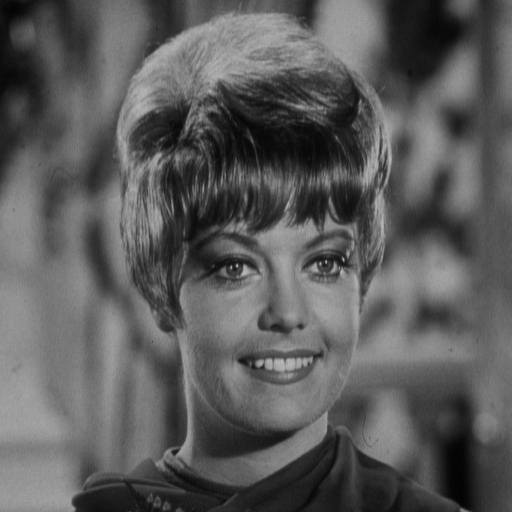

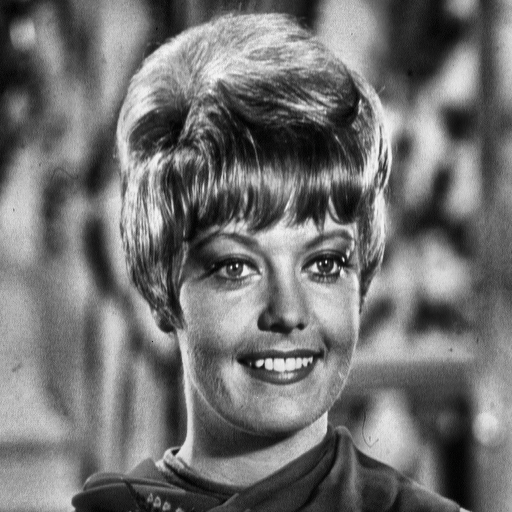

In [268]:
img = cv2.imread('zelda.bmp', 1)
cv2_imshow(img) 
 
lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(lab)

clahe = cv2.createCLAHE(clipLimit=2)
cl = clahe.apply(l)

limg = cv2.merge((cl,a,b))

final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
cv2_imshow(final)

#Soal Nomor 8
####Rotasi citra lena_color.bmp dengan sudut 30° dengan sudut putar titik tengah citra.

####Cara 1

In [269]:
def rotasi(derajat):
    CITRA = Image.open('lena_color.gif')
    PIXEL = CITRA.load()

    ukuran_horizontal = CITRA.size[0]
    ukuran_vertikal = CITRA.size[1]

    CITRA_BARU = Image.new("RGB", (ukuran_horizontal, ukuran_vertikal))
    PIXEL_BARU = CITRA_BARU.load()

    x_tengah = ukuran_horizontal // 2
    y_tengah = ukuran_vertikal // 2

    for x in range(ukuran_horizontal):
        for y in range(ukuran_vertikal):
            theta = derajat * 22/7 / 180

            x_baru = (cos(theta) * (x - x_tengah) - sin(theta)
                      * (y - y_tengah) + x_tengah)
            y_baru = (sin(theta) * (x - x_tengah) + cos(theta)
                      * (y - y_tengah) + y_tengah)

            if (x_baru >= ukuran_horizontal or y_baru >= ukuran_vertikal
                    or x_baru < 0 or y_baru < 0):
                PIXEL_BARU[x, y] = (0, 0, 0)
            else:
                PIXEL_BARU[x, y] = PIXEL[x_baru, y_baru]

    nama_setelah_disave = 'gambar_rotasi_' + str(derajat) + '.jpg'
    CITRA_BARU.save(nama_setelah_disave)
rotasi(30)

####Cara 2

In [271]:
cf = Image.open("lena_color.gif")

cg = cf.rotate(30)

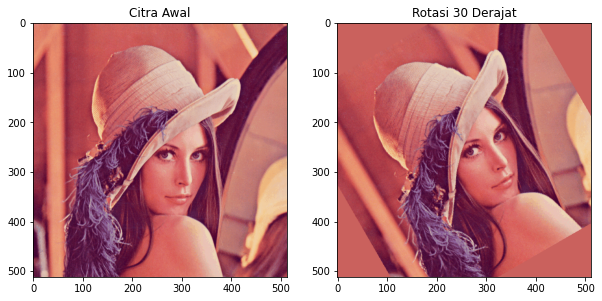

In [272]:
fig, axs = plt.subplots(1, 2, figsize = (10, 10))
axs[0].imshow(cf, cmap='gray', vmin=0, vmax=255)
axs[0].set_title("Citra Awal")
axs[1].imshow(cg, cmap='gray', vmin=0, vmax=255)
axs[1].set_title("Rotasi 30 Derajat")
plt.show()

#Soal Nomor 9
####Cerminkan citra lena_color.gif terhadap titik asal.

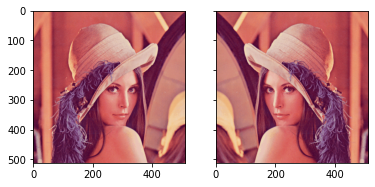

In [273]:
im = imageio.imread('lena_color.gif') 

fig, axs = plt.subplots(1, 2, sharey=True)

axs[0].imshow(im)
axs[1].imshow(im[:, ::-1, :])

#Soal Nomor 10
#### Perbesar citra girl-warna.bmp menjadi 512x512

In [274]:
img_ori = cv2.imread('girl-warna.bmp')
print("Ukuran Asli : ", img_ori.shape)

Ukuran Asli :  (256, 256, 3)


In [275]:
width = 512
height = 512
dim = (width, height)

In [276]:
img_new = cv2.resize(img_ori, dim, interpolation = cv2.INTER_AREA)
print('Perbesar menjadi : ', img_new.shape)

Perbesar menjadi :  (512, 512, 3)


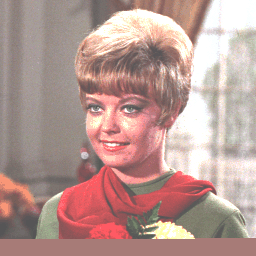

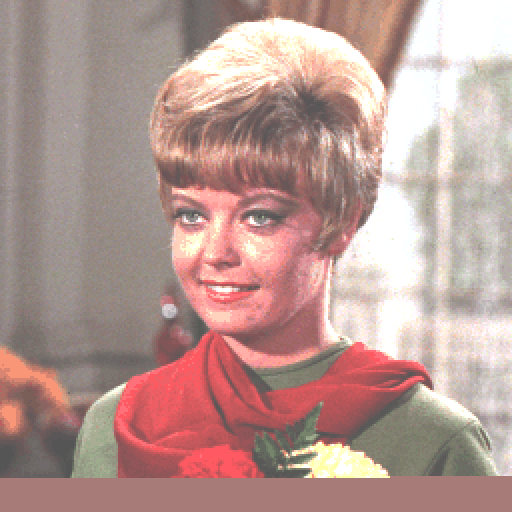

In [277]:
cv2_imshow(img_ori)
cv2_imshow(img_new)